In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('Datasets/Cleaned_prepared_data.csv')
data

In [11]:
data = data[(data['longitude'] <= 20) & (data['longitude'] >= -20)]

In [12]:
# Selecting the features and targets
features = data[['latitude', 'longitude', 'baro_altitude']]
targets = data[['latitude_in_10min', 'longitude_in_10min', 'baro_altitude_in_10min']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Creating a Linear Regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# The model is now trained and can be used for predictions
"Model trained successfully"

'Model trained successfully'

In [13]:
# Predictions on the training and testing sets
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

# Evaluating the model
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

(mae_train, mae_test, r2_train, r2_test)

(1201.5404492729533,
 1178.2857617426973,
 0.7563193157746818,
 0.7598686437947882)

In [14]:
# Separating the predictions and true values for latitude and longitude
train_lat_true, train_long_true, train_alt_true = y_train['latitude_in_10min'], y_train['longitude_in_10min'], y_train['baro_altitude_in_10min']
test_lat_true, test_long_true, test_alt_true = y_test['latitude_in_10min'], y_test['longitude_in_10min'], y_test['baro_altitude_in_10min']
train_lat_pred, train_long_pred, train_alt_pred = train_predictions[:, 0], train_predictions[:, 1], train_predictions[:, 2]
test_lat_pred, test_long_pred, test_alt_pred = test_predictions[:, 0], test_predictions[:, 1], test_predictions[:, 2]

# Calculating metrics for latitude
mae_train_lat = mean_absolute_error(train_lat_true, train_lat_pred)
mae_test_lat = mean_absolute_error(test_lat_true, test_lat_pred)
r2_train_lat = r2_score(train_lat_true, train_lat_pred)
r2_test_lat = r2_score(test_lat_true, test_lat_pred)

# Calculating metrics for longitude
mae_train_long = mean_absolute_error(train_long_true, train_long_pred)
mae_test_long = mean_absolute_error(test_long_true, test_long_pred)
r2_train_long = r2_score(train_long_true, train_long_pred)
r2_test_long = r2_score(test_long_true, test_long_pred)

# Calculating metrics for Altitude
mae_train_alt = mean_absolute_error(train_alt_true, train_alt_pred)
mae_test_alt = mean_absolute_error(test_alt_true, test_alt_pred)
r2_train_alt = r2_score(train_alt_true, train_alt_pred)
r2_test_alt = r2_score(test_alt_true, test_alt_pred)

print("Latitude metrics:", mae_train_lat, mae_test_lat, r2_train_lat, r2_test_lat)
print("Longitude metrics:", mae_train_long, mae_test_long, r2_train_long, r2_test_long)
print("Altitude metrics:", mae_train_alt, mae_test_alt, r2_train_alt, r2_test_alt)

Latitude metrics: 0.6474459712136197 0.6518679381426905 0.9277069365195133 0.9265723745865361
Longitude metrics: 0.28657191523436304 0.2890088213681551 0.9849595062317068 0.9866930327345566
Altitude metrics: 3603.6873299324075 3533.9164084685826 0.3562915045728273 0.36634052406327267


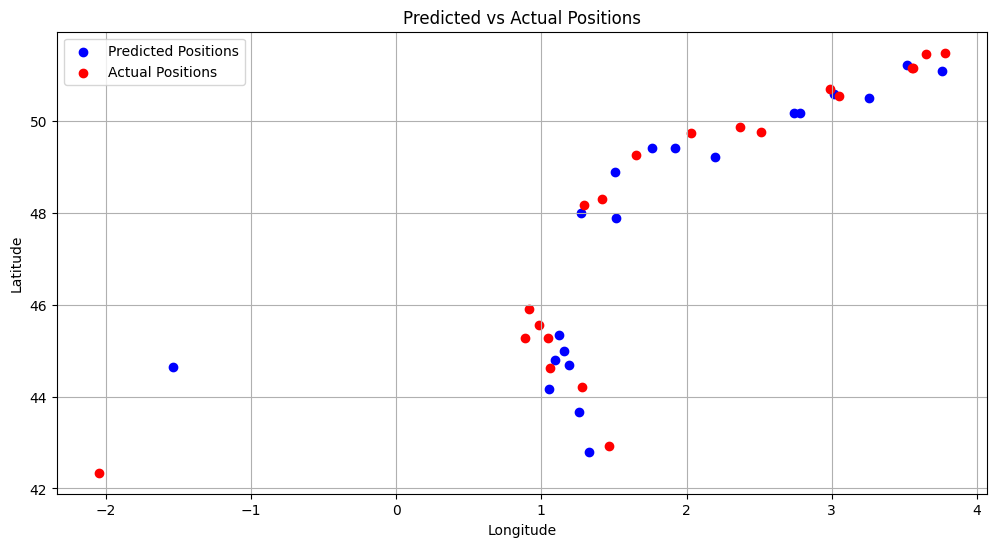

In [15]:
# Selecting a few random samples from the test dataset for prediction
np.random.seed(1)
sample_indices = np.random.choice(X_test.index, size=20, replace=False)
sample_data = X_test.loc[sample_indices]

# Using the model to predict the latitude and longitude in 10 minutes
predicted_positions = linear_model.predict(sample_data)

# Actual positions for comparison
actual_positions = y_test.loc[sample_indices]

# Visualization
plt.figure(figsize=(12, 6))

# Plotting predicted positions
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='blue', label='Predicted Positions')

# Plotting actual positions
plt.scatter(actual_positions['longitude_in_10min'], actual_positions['latitude_in_10min'], color='red', label='Actual Positions')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Positions')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Selecting a few example data points from the test set
example_data = X_test.sample(5, random_state=1)

# Actual values for comparison
actual_values = y_test.loc[example_data.index]

# Making predictions
predictions = linear_model.predict(example_data)

# Creating a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Latitude': actual_values['latitude_in_10min'],
    'Predicted Latitude': predictions[:, 0],
    'Latitude Error': np.abs(actual_values['latitude_in_10min'] - predictions[:, 0]),
    'Actual Longitude': actual_values['longitude_in_10min'],
    'Predicted Longitude': predictions[:, 1],
    'Longitude Error': np.abs(actual_values['longitude_in_10min'] - predictions[:, 1]),
    'Actual Altitude': actual_values['baro_altitude_in_10min'],
    'Predicted Altitude': predictions[:, 2],
    'Altitude Error': np.abs(actual_values['baro_altitude_in_10min'] - predictions[:, 2])
})

comparison.reset_index(drop=True, inplace=True)
comparison

,Actual Latitude,Predicted Latitude,Latitude Error,Actual Longitude,Predicted Longitude,Longitude Error,Actual Altitude,Predicted Altitude,Altitude Error
0,45.559092,44.989462,0.569630,0.986710,1.157650,0.170941,36000.0,36653.075633,653.075633
1,42.934433,42.800303,0.134130,1.467058,1.331643,0.135415,33375.0,32236.175780,1138.824220
2,51.479416,51.074507,0.404909,3.777664,3.756918,0.020746,19125.0,27927.738529,8802.738529
3,48.156418,47.989335,0.167082,1.290688,1.274453,0.016235,34000.0,32370.257422,1629.742578
4,50.693619,50.164015,0.529604,2.987836,2.740369,0.247467,31100.0,31717.185585,617.185585
